# Introduction

This tutorial will demostrate some basic methods of data processing, machine learning in regresion model, feature selection and data visualization on the 2016 US Election dataset(https://www.kaggle.com/benhamner/2016-us-election/downloads/2016-us-election.zip). 

With the aid of some machine learning techniques, we can make accurate prediction on some missing datapoints, achieve better data representation, and hopefully, gain more insights out of the data.

# Import Libraries

Panda, sklearn, and matplotlib are heavily used in this tutorial.

 - Panda (panel data) is a Python data analysis library that makes data manipulation and analysis more easily. It provides data structures and operations for playing around numerical tables and time series.

 - Scikit-learn provides simple and efficent tools for data mining and analysis. Some highlights for tools are classification, regression, clustering, dimensionality reduction and feature selection.
 - Itertools provides some useful functions to traverse through the elements under different scenario such combinations and permutations. We mainly use combinations here to try out different feature set during feature selection.

 - Matplotlib is a 2D plotting library that offers object-oriented API to visualize numerical result.

In a nut shell, the above three libraries are specific for data anaylysis, making prediction, feature selection and data visualization respectively.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from itertools import combinations

# Loading Data

There are three datasets involved in our analysis as follows:
1. Geographic (county_facts.csv)
2. Feature (county_facts_dictionary.csv)
3. Election datasets (primary_results.csv)

From the election result dataset, we calculate the total votes for either a Democrats or Republican candidate statewise. However, there are some missing data points which causes the mismatch of the number of states betweern election and geographic dataset. For example, we have data points of Donald Trump's votes in 46 states, while there are 51 states in the geographic dataset.

The geographic dataset contains statistics of 51 different features, including population, poverty level, education level, races and age.

In [2]:
# Reading country_facts CSV File
geo_features = pd.read_csv('2016-us-election/county_facts.csv')
geo_features.head()

,fips,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,...,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
0,0,United States,NaN,318857056,308758105,3.3,308745538,6.2,23.1,14.5,...,8.3,28.8,5319456312,4174286516,3917663456,12990,613795732,1046363,3531905.43,87.4
1,1000,Alabama,NaN,4849377,4780127,1.4,4779736,6.1,22.8,15.3,...,1.2,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4
2,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
3,1003,Baldwin County,AL,200111,182265,9.8,182265,5.6,22.2,18.7,...,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
4,1005,Barbour County,AL,26887,27457,-2.1,27457,5.7,21.2,16.5,...,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0


In [3]:
# Reading county_facts_dictionary CSV File
features_dict = pd.read_csv('2016-us-election/county_facts_dictionary.csv', header = 0)
features_dict.head()

,column_name,description
0,PST045214,"Population, 2014 estimate"
1,PST040210,"Population, 2010 (April 1) estimates base"
2,PST120214,"Population, percent change - April 1, 2010 to ..."
3,POP010210,"Population, 2010"
4,AGE135214,"Persons under 5 years, percent, 2014"


In [4]:
# Reading primary_results CSV File
prm_res = pd.read_csv('2016-us-election/primary_results.csv')
prm_res.head()

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Alabama,AL,Autauga,1001.0,Democrat,Bernie Sanders,544,0.182
1,Alabama,AL,Autauga,1001.0,Democrat,Hillary Clinton,2387,0.800
2,Alabama,AL,Baldwin,1003.0,Democrat,Bernie Sanders,2694,0.329
3,Alabama,AL,Baldwin,1003.0,Democrat,Hillary Clinton,5290,0.647
4,Alabama,AL,Barbour,1005.0,Democrat,Bernie Sanders,222,0.078


# Feature Dictionary
In the feature dictionary, feature columns are named in a standard format which is not very comprehensible to readers. As a result, a dictionary is build here to relate the indexed names to their meaning.

In [5]:
# Nicely print out features
features_dict = dict(zip(features_dict['column_name'], features_dict['description']))
features_dict

{'AFN120207': 'Accommodation and food services sales, 2007 ($1,000)',
 'AGE135214': 'Persons under 5 years, percent, 2014',
 'AGE295214': 'Persons under 18 years, percent, 2014',
 'AGE775214': 'Persons 65 years and over, percent, 2014',
 'BPS030214': 'Building permits, 2014',
 'BZA010213': 'Private nonfarm establishments, 2013',
 'BZA110213': 'Private nonfarm employment,  2013',
 'BZA115213': 'Private nonfarm employment, percent change, 2012-2013',
 'EDU635213': 'High school graduate or higher, percent of persons age 25+, 2009-2013',
 'EDU685213': "Bachelor's degree or higher, percent of persons age 25+, 2009-2013",
 'HSD310213': 'Persons per household, 2009-2013',
 'HSD410213': 'Households, 2009-2013',
 'HSG010214': 'Housing units, 2014',
 'HSG096213': 'Housing units in multi-unit structures, percent, 2009-2013',
 'HSG445213': 'Homeownership rate, 2009-2013',
 'HSG495213': 'Median value of owner-occupied housing units, 2009-2013',
 'INC110213': 'Median household income, 2009-2013',
 '

In [6]:
#Reading Results CSV File
gop_res = prm_res[prm_res["party"] == "Republican"]
print "[Republicans]\n"
gop_res.head()

[Republicans]



,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
134,Alabama,AL,Autauga,1001.0,Republican,Ben Carson,1764,0.146
135,Alabama,AL,Autauga,1001.0,Republican,Donald Trump,5387,0.445
136,Alabama,AL,Autauga,1001.0,Republican,John Kasich,421,0.035
137,Alabama,AL,Autauga,1001.0,Republican,Marco Rubio,1785,0.148
138,Alabama,AL,Autauga,1001.0,Republican,Ted Cruz,2482,0.205


In [75]:
dem_res = prm_res[prm_res["party"] == "Democrat"]
print "\n[Democrats]\n"
dem_res.head()


[Democrats]



,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Alabama,AL,Autauga,1001.0,Democrat,Bernie Sanders,544,0.182
1,Alabama,AL,Autauga,1001.0,Democrat,Hillary Clinton,2387,0.800
2,Alabama,AL,Baldwin,1003.0,Democrat,Bernie Sanders,2694,0.329
3,Alabama,AL,Baldwin,1003.0,Democrat,Hillary Clinton,5290,0.647
4,Alabama,AL,Barbour,1005.0,Democrat,Bernie Sanders,222,0.078


# Creating Feature Set
This snipet of code groups the election results by candidates, state, and party. In each group, the toal votes and fraction of vote within the party are calculated to generate a new data frame, whose columns are listed as below.
1. Candidate
2. State
3. Party
4. votes
5. fraction_votes

In [8]:
#Calculating statewise total votes and fraction votes
candidates = gop_res.candidate.unique();
parties = gop_res.party.unique();
states = gop_res.state.unique()

state_votes = []
for name, group in gop_res.groupby(['candidate', 'state', 'party']):
    state_vote = group['votes'].sum()
    state_frac = float(group['votes'].sum()) / gop_res[gop_res['state'] == name[1]]['votes'].sum()
    state_votes.append(name + (state_vote, state_frac))

gop_state_df = pd.DataFrame(state_votes)
gop_state_df.columns = ['candidate', 'area_name', 'party', 'votes', 'fraction_votes']

print "In the Republican Party,"
print "Num of candidates: \t", len(candidates)
print "Num of states: \t\t", len(states), "\n"
gop_state_df

In the Republican Party,
Num of candidates: 	11
Num of states: 		46 



,candidate,area_name,party,votes,fraction_votes
0,Ben Carson,Alabama,Republican,87517,0.104481
1,Ben Carson,Alaska,Republican,2401,0.109485
2,Ben Carson,Arkansas,Republican,23173,0.058440
3,Ben Carson,Georgia,Republican,80503,0.063110
4,Ben Carson,Iowa,Republican,17393,0.093148
5,Ben Carson,Massachusetts,Republican,16277,0.026481
6,Ben Carson,Nevada,Republican,3619,0.048332
7,Ben Carson,New Hampshire,Republican,6509,0.023319
8,Ben Carson,Oklahoma,Republican,28572,0.063110
9,Ben Carson,South Carolina,Republican,53326,0.072266


# Merge with geographic data
Now we have the dataframe that contains Repulicans total vote and vote fraction ready. Let's merge with the geographic data and use state as the merge key. As a result, the dataframe is now extended to have features such as population, poverty level, race and age.

In [9]:
# Merging gop and results
gop_features = gop_state_df.merge(geo_features, how="inner", on = 'area_name')
gop_features = gop_features.reset_index(drop = True)
gop_features.drop(['fips', 'state_abbreviation'], axis=1, inplace=True)
gop_features

,candidate,area_name,party,votes,fraction_votes,PST045214,PST040210,PST120214,POP010210,AGE135214,...,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
0,Ben Carson,Alabama,Republican,87517,0.104481,4849377,4780127,1.4,4779736,6.1,...,1.2,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4
1,Donald Trump,Alabama,Republican,371735,0.443793,4849377,4780127,1.4,4779736,6.1,...,1.2,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4
2,John Kasich,Alabama,Republican,37970,0.045330,4849377,4780127,1.4,4779736,6.1,...,1.2,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4
3,Marco Rubio,Alabama,Republican,159802,0.190778,4849377,4780127,1.4,4779736,6.1,...,1.2,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4
4,Ted Cruz,Alabama,Republican,180608,0.215617,4849377,4780127,1.4,4779736,6.1,...,1.2,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4
5,Ben Carson,Alaska,Republican,2401,0.109485,736732,710249,3.7,710231,7.4,...,0.0,25.9,8204030,4563605,9303387,13635,1851293,1518,570640.95,1.2
6,Donald Trump,Alaska,Republican,7346,0.334975,736732,710249,3.7,710231,7.4,...,0.0,25.9,8204030,4563605,9303387,13635,1851293,1518,570640.95,1.2
7,John Kasich,Alaska,Republican,892,0.040675,736732,710249,3.7,710231,7.4,...,0.0,25.9,8204030,4563605,9303387,13635,1851293,1518,570640.95,1.2
8,Marco Rubio,Alaska,Republican,3318,0.151300,736732,710249,3.7,710231,7.4,...,0.0,25.9,8204030,4563605,9303387,13635,1851293,1518,570640.95,1.2
9,Ted Cruz,Alaska,Republican,7973,0.363566,736732,710249,3.7,710231,7.4,...,0.0,25.9,8204030,4563605,9303387,13635,1851293,1518,570640.95,1.2


# Generating feature set for Donald Trump
Since the gop_features consists of results for all Republican datasets, we extract only Donald Trump's for further processing.

In [10]:
trump_features = gop_features[gop_features['candidate'] == 'Donald Trump']
trump_features = trump_features.reset_index(drop = True)
trump_features

,candidate,area_name,party,votes,fraction_votes,PST045214,PST040210,PST120214,POP010210,AGE135214,...,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
0,Donald Trump,Alabama,Republican,371735,0.443793,4849377,4780127,1.4,4779736,6.1,...,1.2,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4
1,Donald Trump,Alaska,Republican,7346,0.334975,736732,710249,3.7,710231,7.4,...,0.0,25.9,8204030,4563605,9303387,13635,1851293,1518,570640.95,1.2
2,Donald Trump,Arkansas,Republican,133144,0.335779,2966369,2915958,1.7,2915918,6.5,...,2.3,24.5,60735582,29659789,32974282,11602,3559795,7666,52035.48,56.0
3,Donald Trump,Georgia,Republican,501707,0.393310,10097343,9688681,4.2,9687653,6.6,...,3.6,30.9,144280774,141962359,117516907,12326,16976235,39423,57513.49,168.4
4,Donald Trump,Iowa,Republican,45419,0.243241,3107126,3046869,2.0,3046355,6.3,...,0.9,25.5,97592051,41068338,39234649,13172,4737719,10256,55857.13,54.5
5,Donald Trump,Massachusetts,Republican,311313,0.506473,6745408,6547817,3.0,6547629,5.4,...,3.3,29.8,86428959,95275672,88082966,13553,14917210,14486,7800.06,839.4
6,Donald Trump,Nevada,Republican,34531,0.461163,2839099,2700692,5.1,2700551,6.2,...,8.1,28.6,15735787,19255893,37433983,14579,28815533,13016,109781.18,24.6
7,Donald Trump,New Hampshire,Republican,100406,0.359711,1326813,1316466,0.8,1316470,4.9,...,1.0,25.8,18592406,14564458,25353874,19246,2630968,3403,8952.65,147.0
8,Donald Trump,Oklahoma,Republican,130141,0.287458,3878051,3751616,3.4,3751351,6.8,...,2.3,25.3,60681358,48074682,43095353,11931,5106585,14179,68594.92,54.7
9,Donald Trump,South Carolina,Republican,239851,0.325038,4832482,4625401,4.5,4625364,6.0,...,1.7,27.6,93977455,40498047,54298410,12273,8383463,27537,30060.70,153.9


At a glimpse of the dataset, we see a mis-match in the number of states between geographic dataframe and trump feature set. In order to have a full fraction votes rate plotted, we will predict the value of those missing states. Let's find out what the missing states are.

In [36]:
# Get missing states in the feature set
g_states = geo_features[geo_features['state_abbreviation'].isnull()]['area_name']
g_states = set(g_states.drop(0))
f_states = set(gop_res['state'].unique())

missing_states = set()
for state in g_states:
    missing_states.add(state) if state not in f_states else None
        
print "Num of states in geo dataset:", len(g_states)
print "Num of states in feature set:", len(f_states)
print "Missing States are: \n", missing_states




Num of states in geo dataset: 51
Num of states in feature set: 46
Missing States are: 
set(['Maine', 'District Of Columbia', 'Minnesota', 'Colorado', 'North Dakota'])


# Linear Regression and Feature Engineering
Now we have the total votes and votes fraction in the party for the 46 states, we would like to predict the other 5 missing states that exist in the geographic dataset by using a linear regression model. The performance is evaluated by calculating the Median Square Error(MSE).

One way to boost the performance is to try out different combination of features and find out the one that yields the lowest MSE. We start from the 16 feature that seem to be the most relevent and evaluate the MSE of every combination down to n = 1. The following code snippets allows us to compute the MSE iteratively from n = 16 to the threshold value.

In [59]:
# Compute MSE of the training dataset
def get_lr_model_MSE(X_train, y_train):
    lr_model = linear_model.LinearRegression()
    lr_model.fit(X_train, y_train)
    yt_pred = lr_model.predict(X_train)
    mse = np.mean(yt_pred - y_train) ** 2
    return lr_model, mse

# Compute MSE and keep the combination that has least MSE
def remove_least_feature(features):
    lr_model = None; lr_mse = float('inf'); lr_comb = []
    feature_combinations = [c for c in combinations(features, len(features) - 1)]
    for comb in feature_combinations:
        X_train = trump_features[list(comb)]
        y_train = trump_features['fraction_votes']
        lr, mse = get_lr_model_MSE(X_train, y_train)
        if mse < lr_mse:
            lr_mse = mse
            lr_model = lr
            lr_comb = comb
    return lr_model, lr_comb, lr_mse

# Compute MSE and keep the combination that has least MSE
def select_features(features, threshold):
    lr_model = None; lr_mse = float('inf'); lr_comb = []
    while len(features) > threshold:
        lr, comb, mse = remove_least_feature(features)
        features = list(comb)
        print "n = %2s, mse = %17s" % (len(comb), mse)
        if mse < lr_mse:
            lr_mse = mse
            lr_model = lr
            lr_comb = comb
    return lr_model, lr_mse, list(lr_comb)

The above functions iterteratively remove a least relevent feature at one time. In our case, we start from the 16 features listed as below, then in the remove_least_feature function, it computes the MSE in the assumption of removing a certain feature, and the one with the highest MSE would be removed. The loop proceeds once the number of features left reaches the threshold.

The combinations in itertools library is used here for convenience of making a list of all possible combinations.

In [68]:
feature_cols = ['AGE135214', 'AGE295214', 'AGE775214', 'EDU635213',
                'EDU685213', 'INC110213', 'PST120214', 'PVY020213',
                'RHI125214', 'RHI225214', 'RHI425214', 'RHI725214',
                'SBO215207', 'SBO315207', 'SBO415207', 'SEX255214']
lr_model, lr_mse, feature_cols = select_features(feature_cols, 1)

print "When n = %s, the mse has the minimum of %s" % (len(feature_cols), lr_mse)
feature_cols

n = 15, mse = 7.44486605534e-33
n = 14, mse = 8.19157348747e-35
n = 13, mse = 4.08577482058e-32
n = 12, mse = 8.74131908596e-34
n = 11, mse = 3.64069932776e-37
n = 10, mse = 6.15278186392e-33
n =  9, mse = 8.19157348747e-33
n =  8, mse = 2.85430827297e-34
n =  7, mse = 4.71834632878e-34
n =  6, mse = 1.02755097827e-32
n =  5, mse = 3.08148791102e-33
n =  4, mse = 1.39948482159e-33
n =  3, mse = 1.07706448913e-32
n =  2, mse = 1.49123044465e-33
n =  1, mse = 9.10174831941e-34
When n = 11, the mse has the minimum of 3.64069932776e-37


['AGE775214',
 'EDU635213',
 'INC110213',
 'PST120214',
 'PVY020213',
 'RHI425214',
 'RHI725214',
 'SBO215207',
 'SBO315207',
 'SBO415207',
 'SEX255214']

After finishing building the linear regression model, it is time to proceed to create features. The goal is to extract the features (eg. poverty level, age, population, and etc) of those missing states (samples), and predict the fraction votes with the linear regression model we just built.

The "missing_states_frac_votes" in the below snippet demostrates the fraction_votes predicted.

In [69]:
# Extract features of the samples
frames = []
for state in missing_states:
    frames.append(geo_features[geo_features['area_name'] == state][feature_cols])
X_p = pd.concat(frames)
y_p = lr_model.predict(X_p)

# Convert back to Panda data frame
missing_states_frac_votes = pd.DataFrame(zip(missing_states, y_p))
missing_states_frac_votes.columns = ['area_name', 'fraction_votes']

# Display the fraction votes for the missing states
missing_states_frac_votes

,area_name,fraction_votes
0,Maine,0.536033
1,District Of Columbia,0.534126
2,Minnesota,0.491343
3,Colorado,0.387619
4,North Dakota,0.283462


In [70]:
# Display the fraction votes for the exsiting states
existing_states_frac_votes = trump_features[['area_name', 'fraction_votes']]
existing_states_frac_votes

,area_name,fraction_votes
0,Alabama,0.443793
1,Alaska,0.334975
2,Arkansas,0.335779
3,Georgia,0.393310
4,Iowa,0.243241
5,Massachusetts,0.506473
6,Nevada,0.461163
7,New Hampshire,0.359711
8,Oklahoma,0.287458
9,South Carolina,0.325038


Finally, we could merge the fraction votes from both missing and existing dataframe as a whole. Here we sort the data fram by the fraction_votes in ascending order for the later visualization purposes.

In [71]:
all_states_frac_votes = pd.concat([existing_states_frac_votes, missing_states_frac_votes])
all_states_frac_votes = all_states_frac_votes.sort_values('fraction_votes', ascending = True)
all_states_frac_votes = all_states_frac_votes.reset_index(drop = True)
all_states_frac_votes

,area_name,fraction_votes
0,Wyoming,0.077519
1,Utah,0.140313
2,Kansas,0.236142
3,Iowa,0.243241
4,Texas,0.276781
5,North Dakota,0.283462
6,Oklahoma,0.287458
7,Idaho,0.290212
8,South Carolina,0.325038
9,Alaska,0.334975


# Visualization
Now we have the vote fractions for 51 locations (50 states and Washinton DC), let's visualize the data with the Matplotlib. Here the bar plot is favored since it displays relative number and proportions of multiple categories in a visual form, and is more self-explanatory than tables. There are vertical and horizonal kinds of bar plot, and the latter one is chosen here.

The matplotlib provides an user-friendly API to set the font size. The following snippet allows the us to set the font size of ticks, axis titles, titles, and etc. 

In [72]:
plt.rc("figure", figsize=(28, 21))
plt.rc("axes", labelsize=20, titlesize=20)
plt.rc("xtick", labelsize=18)
plt.rc("ytick", labelsize=18)
plt.rc("legend", fontsize=18)
plt.rc("font", size=18)

We would like to take a step further to mark the value on the bar plot, which will need the following helper function to label the value (fraction votes) at the end of each rectangle (states). It basically reads the coordinates of the rectangles to determine the fraction votes and the location to put at.

In [73]:
def autolabel(rects, width):
    # attach some text labels
    for rect in rects:
        ax.text(rect.get_width() + 0.02,
                rect.get_y() - (width / 8),
                round(rect.get_width(), 2),
                ha='center', va='bottom')

Drawing a horizontal bar plot requires the following three element:
1. Value in x-axis (eg. fraction votes)
2. Value in y-axis (eg. states)
3. Postition in y-axis (eg. the location where the states is shown)

Additionally, some parameters are taken out for easy-tuning purposes:
- width: tuning the width would widen or narrow the rectangle's width.
- scale: changing the scale variable would modify the gap between categories
- offset: an offset area adding at the top or the bottom of the bar chart

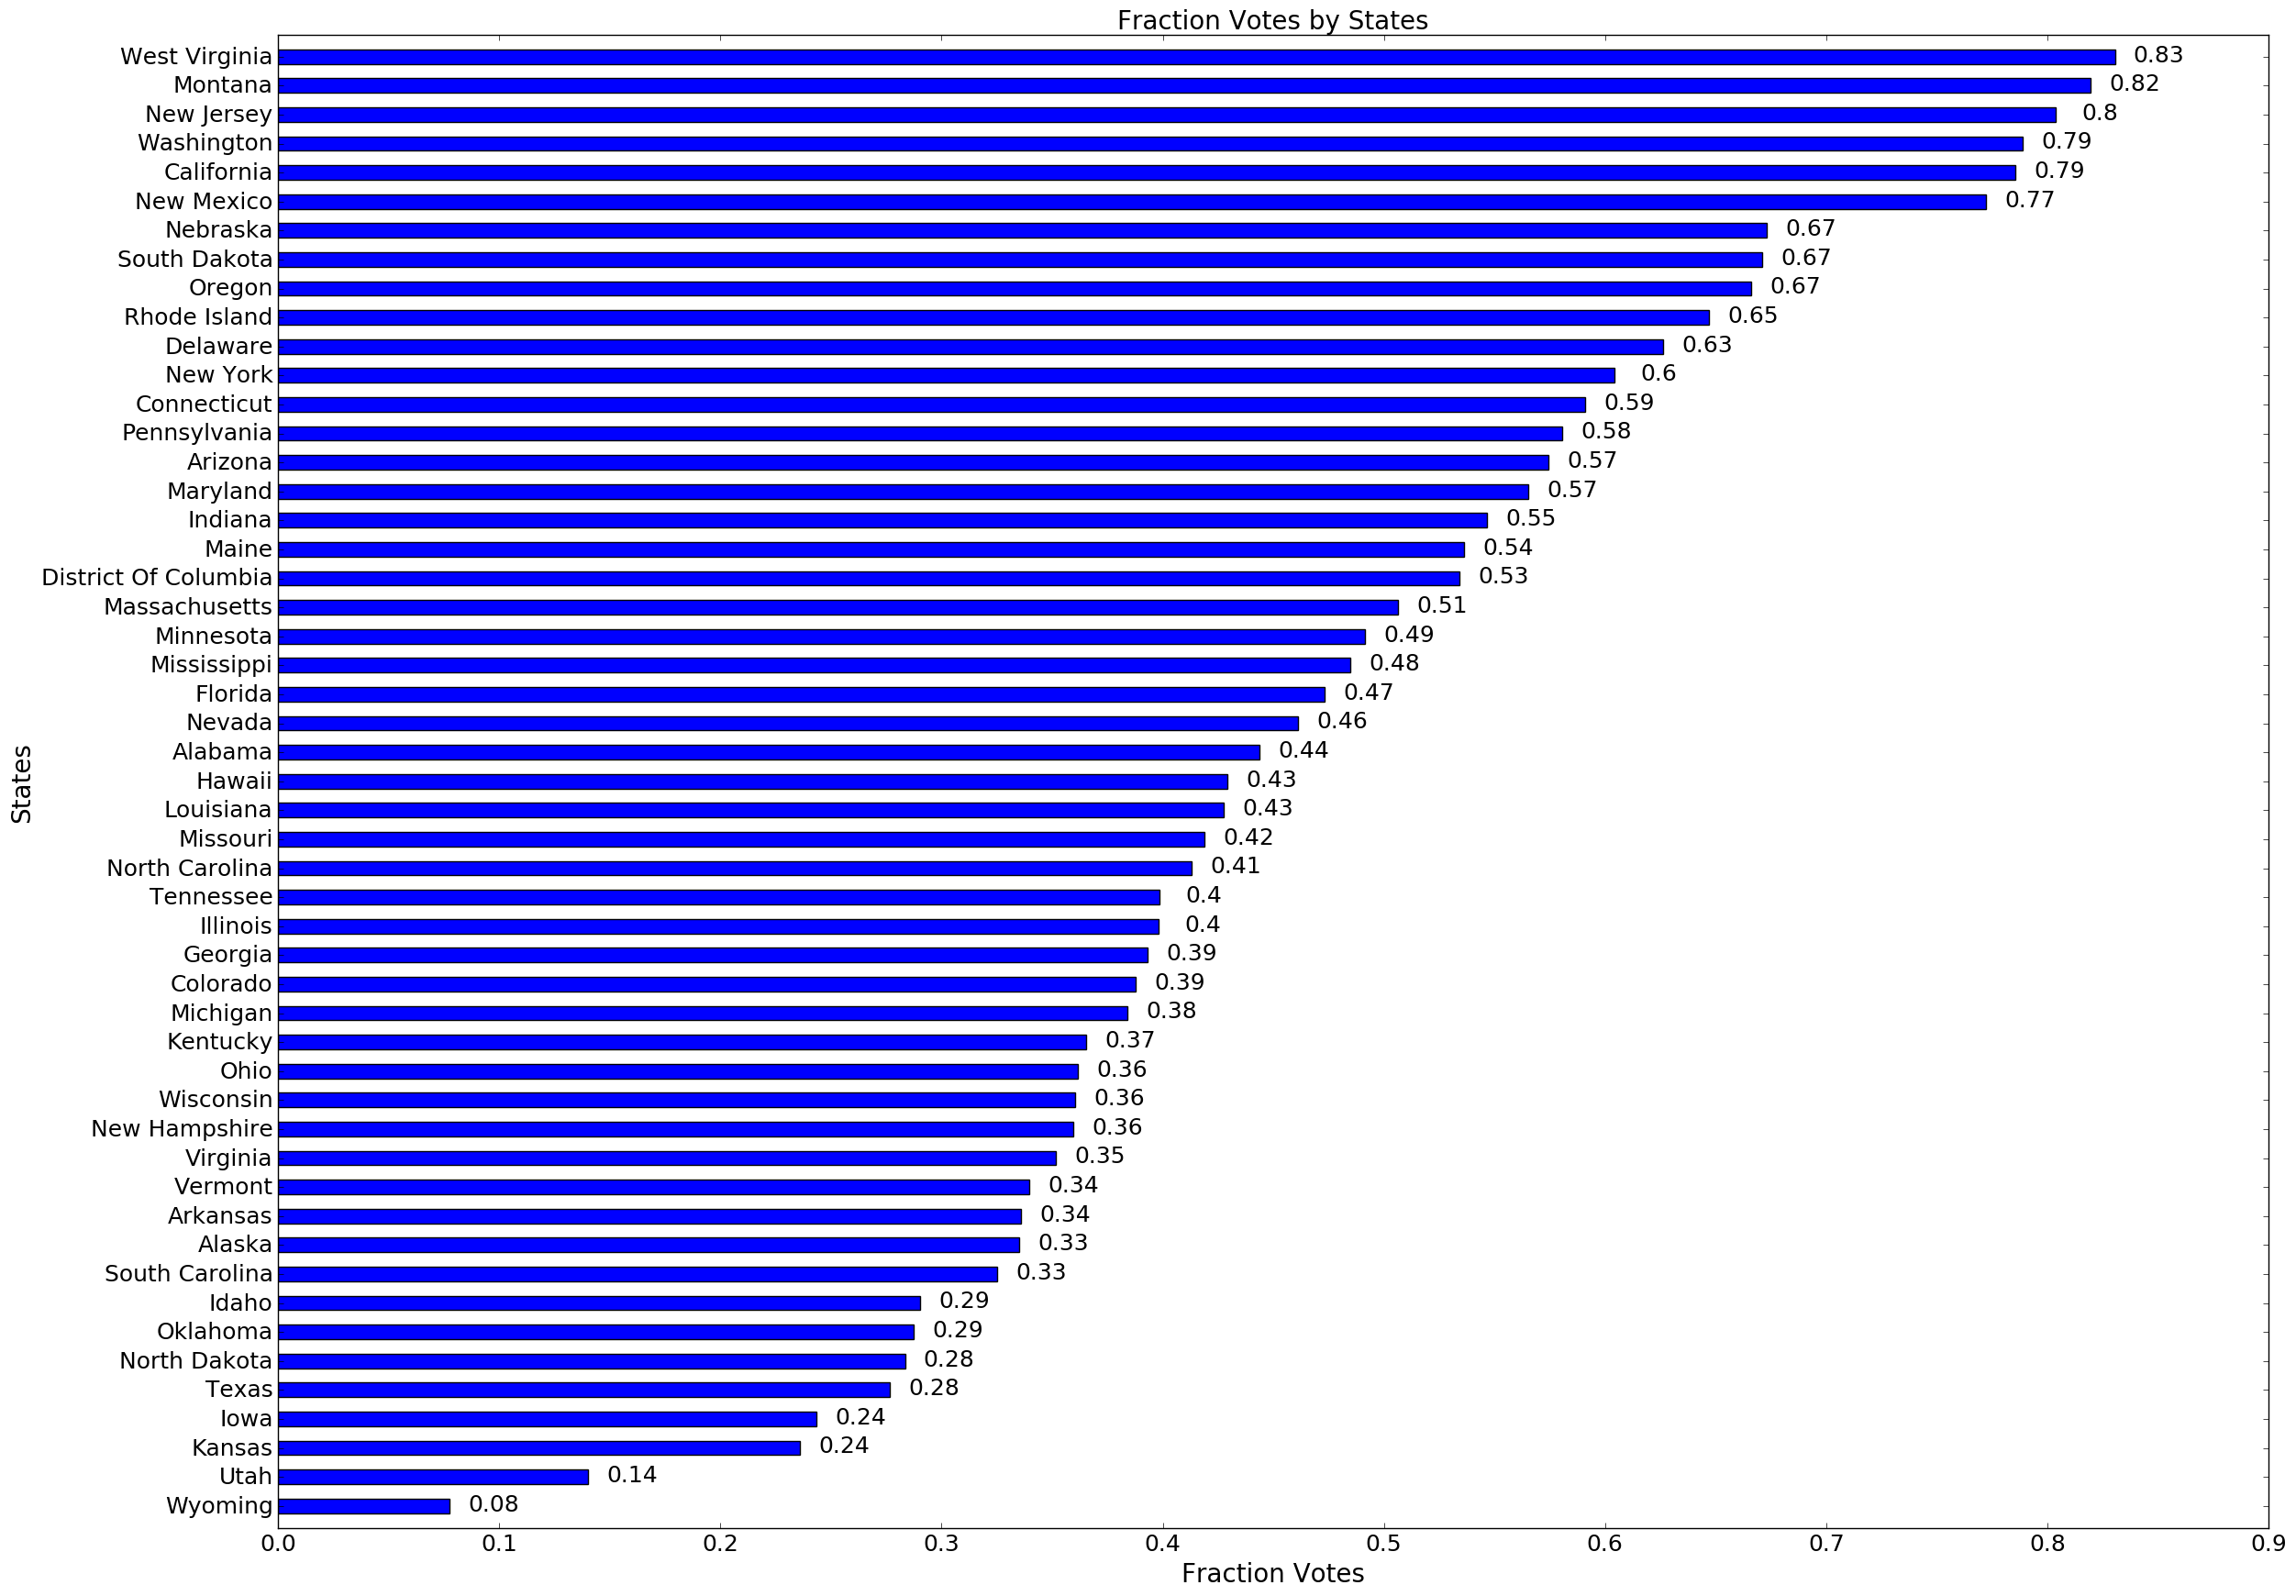

In [74]:
# Parameters for scaling
width = 1.5
scale = 3.0
offset = scale / 2

# Data for contructing rectangles
ind = (all_states_frac_votes.index) * scale + offset
X_v = all_states_frac_votes['fraction_votes']
y_v = all_states_frac_votes['area_name']
fig, ax = plt.subplots()
rect_trump = ax.barh(ind, X_v, width, color='b')

# Labels, title and axes ticks
ax.set_xlabel('Fraction Votes')
ax.set_ylabel('States')
ax.set_title('Fraction Votes by States')
ax.set_yticks(ind + width / 2)
ax.set_yticklabels(y_v)

# Visible range in y-axis
autolabel(rect_trump, width)
y_max = plt.yticks()[0][-1] + offset * 1.5
plt.ylim([0, y_max])
plt.show()

# Summary
This tutorial demonstrated data processing with Panda, making prediction by linear regression model, and data representation with matplotlib.

At the very begining, we saw the power of Panda on the sql-like data manipulation such as filtering by different parameters on specific column. In the dataset, there are 5 missing datapoint in the 51 locations.

Then for the linear regression model, we practiced the preperation for the training dataset and finally making the prediction based on the input feature of the 5 missing states, whose results are evaluated by MSE.

Lastly, to best present the data in an intuitive manner, the horizonal bar plot is adopted to show the fraction votes for Downald Trump across 50 states and Washinton DC.

# References

As this tutorial covers only basic usage of some python libraries, more details are provided as following points of reference.

- Pandas: http://pandas.pydata.org/
- Matplotlib: http://matplotlib.org/
- Bar chart example: http://matplotlib.org/examples/pylab_examples/barchart_demo.html
- Bar chart Tutorial: https://plot.ly/matplotlib/bar-charts/
- Bar char label: http://matplotlib.org/examples/api/barchart_demo.html
- Scikit-learn: http://scikit-learn.org/
- Linear Models in Scikit-learn: http://scikit-learn.org/stable/modules/linear_model.html